In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv('accalldata.csv')

In [ ]:
school=pd.read_csv('schoolzone.csv',encoding='cp949')
school.head()

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,광장초등학교,서울특별시 광진구 광장로1길 27,서울특별시 광진구 광장동 389-1,37.548549,127.101800,서울특별시청,광진경찰서,Y,5,NaN,2020-12-23
1,초등학교,구의초등학교,서울특별시 광진구 광나루로30길 49,서울특별시 광진구 화양동 303-9,37.543007,127.080312,서울특별시청,광진경찰서,Y,7,NaN,2020-12-23
2,초등학교,동의초등학교,서울특별시 광진구 영화사로 111,서울특별시 광진구 구의2동 4-5,37.553422,127.099047,서울특별시청,광진경찰서,Y,7,NaN,2020-12-23
3,초등학교,동자초등학교,서울특별시 광진구 뚝섬로 561,서울특별시 광진구 자양3동 518-1,37.535058,127.072179,서울특별시청,광진경찰서,Y,3,NaN,2020-12-23
4,초등학교,신자초등학교,서울특별시 광진구 자양동 뚝섬로46길 64,서울특별시 광진구 자양2동 591,NaN,127.073328,서울특별시청,광진경찰서,Y,7,NaN,2020-12-23


In [ ]:
mask=(school['위도'].isnull()|school['경도'].isnull())
school.loc[mask,:]

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
4,초등학교,신자초등학교,서울특별시 광진구 자양동 뚝섬로46길 64,서울특별시 광진구 자양2동 591,NaN,127.073328,서울특별시청,광진경찰서,Y,7,NaN,2020-12-23
43,유치원,신자병설유치원,서울특별시 광진구 자양동 뚝섬로46길 64,서울특별시 광진구 자양2동 591,37.530017,NaN,서울특별시청,광진경찰서,Y,1,NaN,2020-12-23


In [ ]:
school.loc[4,'위도']=37.530017
school.loc[43,'경도']=127.073328

In [ ]:
def haversine(coord1, coord2):
    import math
    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2
    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters)
    km = round(km, 3)
    # print(f"Distance: {meters} m")
    # print(f"Distance: {km} km")
    return meters

In [ ]:
data_copy=data.copy()

In [ ]:
data_copy2=data_copy.copy()

In [ ]:
for idx,(lon1,lat1) in enumerate(zip(data_copy2['경도'],data_copy2['위도'])):
    for lon2,lat2 in zip(school['경도'],school['위도']):
        meters=haversine(coord1=(lon1,lat1),coord2=(lon2,lat2))
        if meters<300:
            data_copy2.loc[idx,'schoolzone']=1

In [ ]:
!curl ipecho.net/plain

# https://developers.kakao.com/console/app/474191/advanced/allowedIp

35.247.98.70

In [ ]:
len(data_copy2[data_copy2['schoolzone'].notna()])

60

In [ ]:
data2=data_copy2

In [ ]:
data2=data2[data2['schoolzone']==1]

In [ ]:
# data2.apply(lambda row:str(row['사고유형대분류'])+'_'+str(row['사고유형중분류']),axis=1).value_counts()
data2.head()

,연,월,일,시간,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),주야구분,요일,위도,경도,사망자수,부상자수,중상자수,경상자수,사고유형대분류,사고유형중분류,사고유형소분류,주소,지역,schoolzone
3,2012,2,13,11,4.0,122.8,1.0,0.0,29.5,1,2,37.559601,127.073653,1,1,0,0,2,24,25,서울특별시 광진구 중곡동,중곡동,1.0
4,2012,4,18,18,21.0,301.6,1.7,0.0,29.5,2,4,37.548010,127.070634,1,1,0,0,1,15,05,서울특별시 광진구 군자동,군자동,1.0
6,2012,6,14,3,20.3,50.9,2.3,0.0,73.2,2,5,37.567853,127.078655,1,3,2,0,1,11,01,서울특별시 광진구 중곡동,중곡동,1.0
7,2012,7,24,20,29.0,309.5,1.8,0.0,77.4,2,3,37.540369,127.087278,1,1,0,0,1,15,05,서울특별시 광진구 구의동,구의동,1.0
8,2012,7,30,9,29.1,250.9,2.2,0.0,78.4,1,2,37.557404,127.076673,1,1,0,0,1,12,02,서울특별시 광진구 군자동,군자동,1.0


In [ ]:
!pip install catboost

In [ ]:
train=data2.iloc[:,np.r_[1,2,3,4,6,7,8,9,10,-2,-6]]
## 1 : 차대사람 2 : 차대차 3 : 차량단독
## 1 : 주간 2 : 야간
train.head()

,월,일,시간,기온(°C),풍속(m/s),강수량(mm),습도(%),주야구분,요일,지역,사고유형대분류
3,2,13,11,4.0,1.0,0.0,29.5,1,2,중곡동,2
4,4,18,18,21.0,1.7,0.0,29.5,2,4,군자동,1
6,6,14,3,20.3,2.3,0.0,73.2,2,5,중곡동,1
7,7,24,20,29.0,1.8,0.0,77.4,2,3,구의동,1
8,7,30,9,29.1,2.2,0.0,78.4,1,2,군자동,1


## 그래프 및 훈련

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

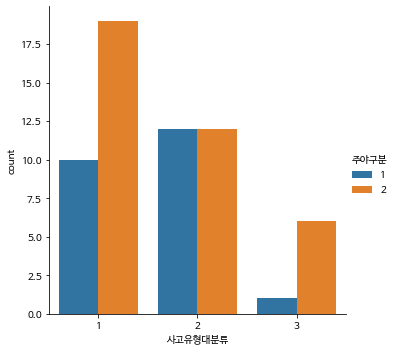

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

sns.catplot(data=train,x='사고유형대분류',hue='주야구분',kind='count')

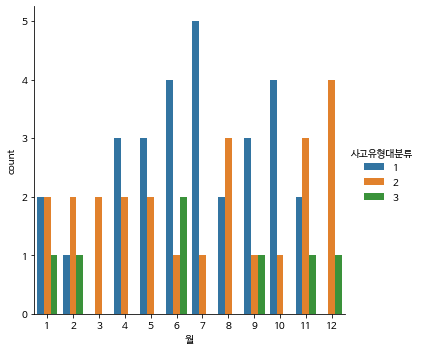

In [ ]:
sns.catplot(data=train,x='월',hue='사고유형대분류',kind='count')

In [ ]:
# 날씨는 구글에서 가져오기
# 광진구 화양동 날씨
# 광진구 .. 날씨

In [ ]:
from catboost import Pool, CatBoostClassifier

cat_features=list([0,1,2,7,8,9])

train_pool=Pool(data=train.iloc[:,:-1],label=train.iloc[:,-1],cat_features=cat_features)

model=CatBoostClassifier(objective='MultiClass',n_estimators=1000,random_state=71)

In [ ]:
model.fit(train_pool,plot=True,use_best_model=True,verbose=0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


In [ ]:
model.predict_proba([[10,29,11,17,1,0,46,1,'능동',3]])

array([[0.85851062, 0.10455918, 0.03693021]])

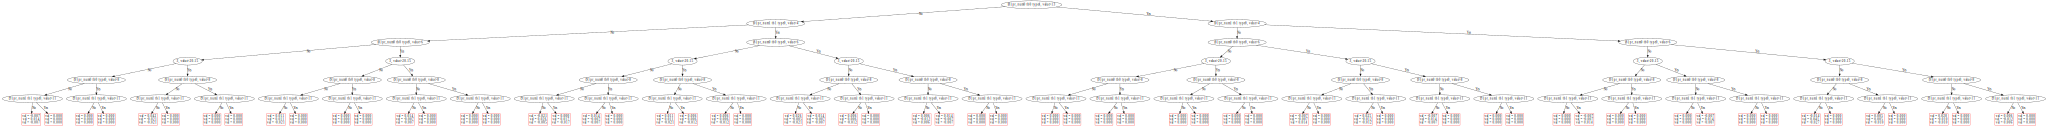

In [ ]:
model.plot_tree(tree_idx=0, pool=None)